# Breast Cancer Proteomes Analysis

### Downloading the Dataset

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
#### import dataset
dataset_url = 'https://www.kaggle.com/piotrgrabo/breastcancerproteomes' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anubratadas
Your Kaggle Key: ········


100%|██████████| 5.27M/5.27M [00:00<00:00, 204MB/s]

The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = './breastcancerproteomes'

In [7]:
mv breast_cancer_proteomes_jovian_project.ipynb ./breastcancerproteomes/

In [8]:
import os
os.listdir(data_dir)

['77_cancer_proteomes_CPTAC_itraq.csv',
 'breast_cancer_proteomes_jovian_project.ipynb',
 'clinical_data_breast_cancer.csv',
 'PAM50_proteins.csv']

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "breast_cancer_proteomes_jovian_project" # change this (use lowercase letters and hyphens only)

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-jovian-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project


'https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project'

## Data Preparation and Cleaning

#### This is a Cancer Proteome Data

#### we shall fill NA values with mean

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
cd breastcancerproteomes/

/home/jovyan/breastcancerproteomes


In [15]:
proteome=pd.read_csv('77_cancer_proteomes_CPTAC_itraq.csv',header=0)

In [16]:
proteome.head(n=3)

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [17]:
proteome.shape

(12553, 86)

In [18]:
data_type=proteome.dtypes.reset_index()
data_type.columns=["count","column_type"]
data_type.groupby("column_type").aggregate("count").reset_index()

,column_type,count
0,float64,83
1,object,3


### OBSERVATION
#### The dataset has 12553 rows and 86 columns.
#### Here there are 83 samples with their identifiers. There are 12553 genes. 
#### Thus format is rows as features and columns as samples
#### To make it biologically meaningful, we have to reshape the data to the conventional rows as samples and columns as features

In [19]:
ls

77_cancer_proteomes_CPTAC_itraq.csv           clinical_data_breast_cancer.csv
breast_cancer_proteomes_jovian_project.ipynb  PAM50_proteins.csv


In [46]:
proteins=proteome.RefSeq_accession_number.tolist()

In [47]:
proteome_samples=proteome.iloc[:,3:]
proteome_samples.head()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [48]:
proteome_samples=proteome_samples.transpose()
proteome_samples.head()

,0,1,2,3,4,5,6,7,8,9,...,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552
AO-A12D.01TCGA,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
C8-A131.01TCGA,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [49]:
proteome_samples.columns=proteins

In [51]:
reshaped_proteome=proteome_samples

##### we have reshaped the dataset as features as columns and samples as rows. The Refseq accession numbers are permanent and can be used to access the database and hence were used as column descriptors. The  protein names can be easily obtained from Refseq and hence Gene_symbol and Gene_name are removed for further analysis

In [55]:
reshaped_proteome.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
AO-A12D.01TCGA,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
C8-A131.01TCGA,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


##### get NA values

In [59]:
for col in reshaped_proteome.columns:
    x=reshaped_proteome[col].isna().sum()
    if x!=0:
        print(f'{col} has {x} NA values')

NP_067047 has 19 NA values
NP_060227 has 9 NA values
NP_055796 has 2 NA values
NP_001156806 has 13 NA values
NP_000251 has 16 NA values
NP_001094891 has 15 NA values
NP_057323 has 52 NA values
NP_001138722 has 42 NA values
NP_443141 has 41 NA values
NP_055185 has 9 NA values
NP_001164655 has 15 NA values
NP_596870 has 7 NA values
NP_001229542 has 59 NA values
NP_001138668 has 60 NA values
NP_001014364 has 53 NA values
NP_055107 has 6 NA values
XP_003960896 has 3 NA values
XP_003960532 has 53 NA values
NP_001138599 has 2 NA values
NP_055710 has 5 NA values
NP_115645 has 31 NA values
NP_940980 has 16 NA values
NP_055458 has 1 NA values
NP_008995 has 20 NA values
NP_031382 has 12 NA values
NP_006050 has 6 NA values
NP_115927 has 21 NA values
NP_057613 has 4 NA values
NP_258259 has 2 NA values
NP_149022 has 15 NA values
NP_878905 has 7 NA values
NP_005541 has 3 NA values
NP_065867 has 12 NA values
NP_659464 has 14 NA values
NP_008832 has 2 NA values
NP_005550 has 12 NA values
NP_001075031 

In [62]:
reshaped_proteome.mean()

NP_958782       0.320232
NP_958785       0.326915
NP_958786       0.326425
NP_000436       0.323683
NP_958781       0.327083
                  ...   
NP_001191293   -3.727669
NP_775791      -0.696448
NP_004065      -0.585666
NP_068752      -0.640042
NP_219494      -1.289686
Length: 12553, dtype: float64

##### NA values filled with mean

In [65]:
reshaped_proteome=reshaped_proteome.fillna(reshaped_proteome.mean())

In [66]:
reshaped_proteome.isna().sum().sort_values(ascending=False)

NP_219494       0
NP_056936       0
NP_001243582    0
NP_001258777    0
NP_942596       0
               ..
NP_001263302    0
NP_003358       0
NP_000472       0
NP_061893       0
NP_958782       0
Length: 12553, dtype: int64

##### The last 3 samples are healthy tissue.We have created a column 'Type', and labelled cancer tissue 
##### as 0 and healthy tissue as 1 

In [86]:
reshaped_proteome['Type']=0
reshaped_proteome.iloc[-3:,-1]=1

In [89]:
reshaped_proteome.loc[:,'Type']

AO-A12D.01TCGA    0
C8-A131.01TCGA    0
AO-A12B.01TCGA    0
BH-A18Q.02TCGA    0
C8-A130.02TCGA    0
                 ..
BH-A0C7.36TCGA    0
A2-A0SX.36TCGA    0
263d3f-I.CPTAC    1
blcdb9-I.CPTAC    1
c4155b-C.CPTAC    1
Name: Type, Length: 83, dtype: int64

In [91]:
reshaped_proteome.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494,Type
AO-A12D.01TCGA,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,-0.792665,0.142576,-0.340163,-4.606941,-3.727669,-0.696448,-0.585666,-0.633517,12.666488,0
C8-A131.01TCGA,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,-0.792665,0.142576,3.451902,-4.606941,-3.727669,-0.696448,-0.585666,4.840325,0.140736,0
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,-0.792665,0.142576,-1.718531,-4.606941,-3.727669,-0.696448,-0.585666,-1.965192,-2.854835,0
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,-0.792665,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,-0.640042,-3.069752,0
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,-0.792665,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,-0.640042,-0.047997,0


In [67]:
import jovian

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-jovian-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project


'https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project'

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [93]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [98]:
reshaped_proteome.Type.value_counts()

0    80
1     3
Name: Type, dtype: int64

In [110]:
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [111]:
plt.rcParams.update({'font.size': 22})

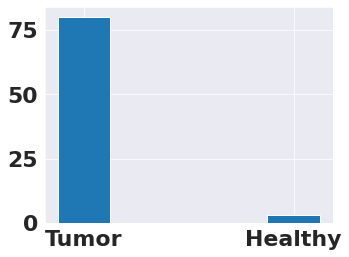

In [112]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
Type = ['Tumor', 'Healthy']
value = [80,3]
ax.bar(Type,value,width=0.25)
plt.show()

#### This is an imbalanced dataset with 2 classes

In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-jovian-project-1" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project-1


'https://jovian.ml/anubratadas/breast-cancer-proteomes-jovian-project-1'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Let us save and upload our work to Jovian before continuing

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'